In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

crime = pd.read_csv('Crimes.csv')
crimes = pd.read_csv('Crimes.csv')
holidays = pd.read_csv('holidays.csv')

weather = pd.read_csv('weather.csv')
moon = pd.read_csv('full_moon.csv')

jobs = pd.read_csv('CHIC917URN.csv')
merged = pd.read_csv('merged3.csv')

In [3]:
crime.columns

# LOCATION OF CRIME
#'Block', 
#'Beat',
#'District',
#'Ward', 
#'Community Area', 
#'Location Description',
#'X Coordinate',
#'Y Coordinate', 
#'Latitude', 
#'Longitude',
#'Location'


# TYPE OF CRIME
#'IUCR', 
#'Primary Type',
#'Description',
#'FBI Code', 
#'Domestic', 


# TIME OF CRIME
#'Date', 
#'Year', 
#'Updated On', 

# UNIQUE IDENTIFIERS
#'ID', 
#'Case Number', 
#'Arrest', 


crime_new = crime.loc[:, ['Date', 'Block', 'Primary Type', 'Description', 'Location Description', 'District', 'Ward', 
                      'Community Area', 'Year']]

crime_new.tail() # 2018 to 2024?

Date                 Block        Primary Type  \
512182  04/17/2023 08:45:00 AM   027XX W HARRISON ST             BATTERY   
512183  07/08/2023 02:15:00 AM  047XX W VAN BUREN ST  DECEPTIVE PRACTICE   
512184  05/26/2023 12:01:00 AM  007XX S KILBOURN AVE     CRIMINAL DAMAGE   
512185  04/29/2023 08:43:00 PM      038XX W ADAMS ST           NARCOTICS   
512186  06/19/2023 10:17:00 AM  044XX W JACKSON BLVD             BATTERY   

                                              Description  \
512182                            DOMESTIC BATTERY SIMPLE   
512183                FINANCIAL IDENTITY THEFT OVER $ 300   
512184                                        TO PROPERTY   
512185                            FOUND SUSPECT NARCOTICS   
512186  AGGRAVATED POLICE OFFICER - OTHER DANGEROUS WE...   

       Location Description  District  Ward  Community Area  Year  
512182             SIDEWALK        11  28.0            27.0  2023  
512183                  NaN        11  28.0            25.0  2023  
512184            APARTMENT        11  24.0            26.0  2023  
512185               STREET        11  28.0            26.0  2023  
512186               STREET        11  28.0            26.0  2023

In [4]:
holidays.head(15)

Holiday        Date Day of Week
0               New Year's Day  2010-01-01      Friday
1   Martin Luther King Jr. Day  2010-01-18      Monday
2              Presidents' Day  2010-02-15      Monday
3                 Memorial Day  2010-05-31      Monday
4             Independence Day  2010-07-04      Sunday
5                    Labor Day  2010-09-06      Monday
6                 Columbus Day  2010-10-11      Monday
7                 Veterans Day  2010-11-11    Thursday
8             Thanksgiving Day  2010-11-25    Thursday
9                Christmas Day  2010-12-25    Saturday
10              New Year's Day  2011-01-01    Saturday
11  Martin Luther King Jr. Day  2011-01-17      Monday
12             Presidents' Day  2011-02-21      Monday
13                Memorial Day  2011-05-30      Monday
14            Independence Day  2011-07-04      Monday

In [ ]:
# plot holidays?
# check and see what months are more common?

In [5]:
weather.columns
# weather.loc[:, 'moonphase'].value_counts



Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

In [16]:
moon.head() # turn these into datetime objects, could have a column in the final df for the model

Year     FullMoonDates
0  2005   25 January 2005
1  2005  24 February 2005
2  2005     25 March 2005
3  2005     24 April 2005
4  2005       23 May 2005

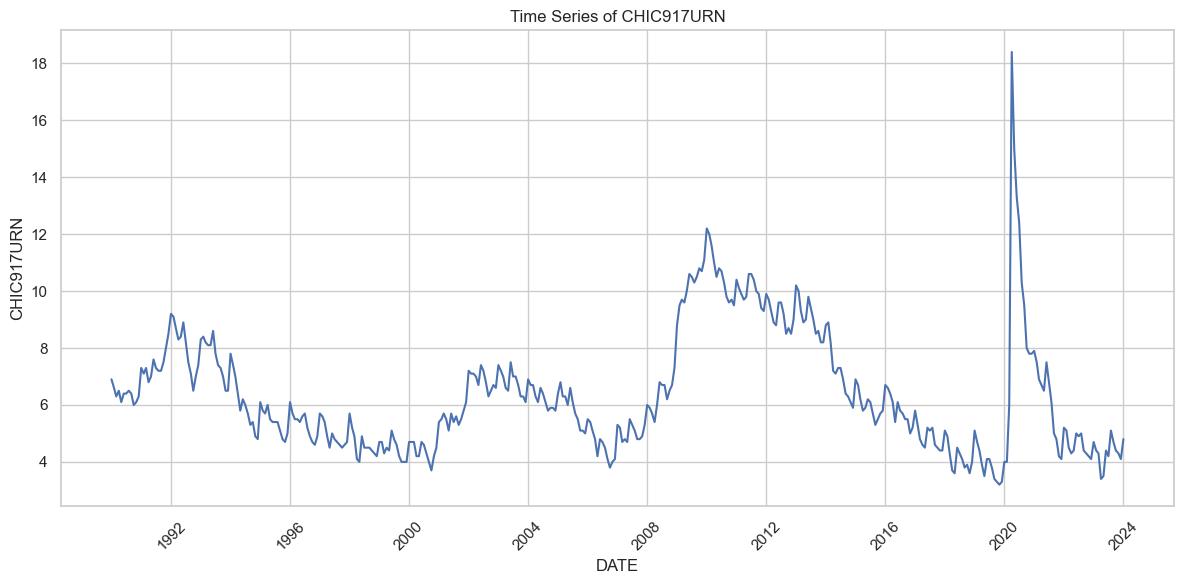

In [4]:
jobs['DATE'] = pd.to_datetime(jobs['DATE'])
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='DATE', y='CHIC917URN', data=jobs)
plt.title('Time Series of CHIC917URN')
plt.xlabel('DATE')
plt.ylabel('CHIC917URN')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [5]:
# code from Daisy:
crimes = pd.read_csv('Crimes.csv')
full_moon = pd.read_csv('full_moon.csv')
holidays = pd.read_csv('holidays.csv')
weather = pd.read_csv('weather.csv')
unemploy = pd.read_csv('CHIC917URN.csv')

weather['date'] = pd.to_datetime(weather['datetime'])
weather.drop(columns=['datetime'], inplace = True)

crimes['Date'] = pd.to_datetime(crimes.Date)
crimes['date'] = pd.to_datetime(pd.to_datetime(crimes['Date']).dt.date)
crimes['time'] = pd.to_datetime(crimes['Date']).dt.time
crimes['day_of_week'] = pd.to_datetime(crimes['date']).dt.day_of_week
crimes.drop(columns=['Date'], inplace=True)

full_moon['date'] = pd.to_datetime(full_moon.FullMoonDates)
full_moon.drop(columns=['FullMoonDates', 'Year'], inplace=True)
full_moon['full_moon'] = (pd.DataFrame({'full_moon': pd.Series(['full moon'] * len(full_moon))}))

holidays['date'] = pd.to_datetime(holidays.Date)
holidays.drop(columns = ['Date'], inplace=True)

unemploy['date'] = pd.to_datetime(unemploy['DATE'])
unemploy.drop(columns=['DATE'], inplace = True)

crime_count = pd.DataFrame(crimes['date'].value_counts().reset_index())

merged2 = pd.merge(crime_count, weather, on='date', how='left')
merged2 = pd.merge(merged2, full_moon, on='date', how = 'left')
merged2 = pd.merge(merged2, holidays, on='date', how = 'left')
merged2 = pd.merge(merged2, unemploy, on='date', how = 'left')

merged2 = merged2[merged2['date'].dt.year > 2009]
merged2 = merged2.sort_values(by = 'date')

merged2['CHIC917URN'] = merged2['CHIC917URN'].fillna(method='ffill')

merged2['day_of_week'] = pd.to_datetime(merged2['date']).dt.day_of_week
merged2['year'] = pd.to_datetime(merged2['date']).dt.year
merged2['month'] = pd.to_datetime(merged2['date']).dt.month

# X = merged2[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'humidity',
#              'precip', 'precipprob', 'precipcover', 'snow', 
#              'snowdepth', 'windgust', 'windspeed', 'winddir', 
#              'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 
#              'solarenergy', 'uvindex', 'severerisk', 
#              'moonphase', 'day_of_week', 'year', 'month', 'preciptype', #'sunrise', 'sunset', 
#              'conditions', 'full_moon', 'Holiday', 'CHIC917URN']]

# num_features = merged2[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'humidity',
#                         'precip', 'precipprob', 'precipcover', 'snow',
#                         'snowdepth', 'windgust', 'windspeed', 'winddir', 
#                         'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 
#                         'moonphase', 'day_of_week', 'year', 'month', 'CHIC917URN']]

# cat_features = merged2[['preciptype', 'conditions', 'full_moon', 'Holiday']]


cat_features = ['preciptype', 'conditions', 'full_moon', 'Holiday']
num_features = ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'humidity',
                        'precip', 'precipprob', 'precipcover', 'snow',
                        'snowdepth', 'windgust', 'windspeed', 'winddir', 
                        'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 
                        'moonphase', 'day_of_week', 'year', 'month', 'CHIC917URN'
               ]





X = merged2[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'humidity',
                        'precip', 'precipprob', 'precipcover', 'snow',
                        'snowdepth', 'windgust', 'windspeed', 'winddir', 
                        'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 
                        'moonphase', 'day_of_week', 'year', 'month', 'CHIC917URN',
                        'preciptype', 'conditions', 'full_moon', 'Holiday']]




# cat_features = X.select_dtypes(include="object").columns
# num_features = X.select_dtypes(exclude="object").columns

y = list(merged2['count'])


/var/folders/xb/kh9kw84n5k57h6w4jp5kr23m0000gn/T/ipykernel_8588/384914213.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged2['CHIC917URN'] = merged2['CHIC917URN'].fillna(method='ffill')


In [10]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet # use CV or not?

from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.feature_selection import SelectPercentile, f_regression
import warnings

from sklearn.ensemble import AdaBoostRegressor

In [23]:
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

numeric = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('standardize', StandardScaler())])

categorical = Pipeline(steps=[('impute2', SimpleImputer(strategy='most_frequent')),
                     ('one_hot', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),
                     ('percent', SelectPercentile(f_regression, percentile=60))
                     ])

preprocessor = ColumnTransformer(
    transformers=[
        ("numeric", numeric, num_features),
        ("categorical", categorical, cat_features)
        ]
)


models = {
#     'Ridge': RidgeCV(alphas=np.logspace(-6,6,30), cv=10),  
#     'Lasso': LassoCV(cv=10),
#     'Elastic Net': ElasticNet(alpha=0.1, l1_ratio=0.5),
#     'Ridge': Ridge(),  
#     'Lasso': Lasso(),
    'Elastic Net': ElasticNet(),
    'Adaboost': AdaBoostRegressor()
}

# Create a pipeline for each model
pipelines = {}
for model_name, model in models.items():
    pipelines[model_name] = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

# Fit and evaluate each pipeline
results = {}
results_MSE = {}
for model_name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)  # Fit the pipeline
    y_pred = pipeline.predict(X_test)  # Make predictions
    mae = mean_absolute_error(y_test, y_pred)  # Calculate MAE
    mse = mean_squared_error(y_test, y_pred)
    
    results[model_name] = mae
    results_MSE[model_name] = mse
    

# Print results
for model_name, mae in results.items():
    print(f"{model_name}: MAE = {mae}")


for model_name, mse in results_MSE.items():
    print(f"{model_name}: MSE = {mse}")


Elastic Net: MAE = 8.153378627311417
Adaboost: MAE = 7.956172750080256
Elastic Net: MSE = 107.50374973332
Adaboost: MSE = 103.59164340049182


In [20]:
# # With adaboost
Apipe = Pipeline([('preprocessor', preprocessor),
           ('model', AdaBoostRegressor())])
APipe = Apipe.fit(X_train, y_train)
ada_model = Apipe.named_steps['model']
preprocessor = Apipe.named_steps['preprocessor']
feature_names = preprocessor.transformers_[0][2]
for feature_name, importance in zip(feature_names, ada_model.feature_importances_):
    print(feature_name, importance)
    

    

    
#     # Sort feature importances in descending order
# sorted_indices = ada_model.feature_importances_.argsort()[::-1]
# sorted_feature_names = [feature_names[idx] for idx in sorted_indices]
# sorted_importances = ada_model.feature_importances_[sorted_indices]

# # Print sorted feature importances
# for feature_name, importance in zip(sorted_feature_names, sorted_importances):
#     print(feature_name, importance)


tempmax 0.029487259957755235
tempmin 0.03636113183691828
temp 0.013045060468297799
feelslikemax 0.006840543254394737
feelslikemin 0.014998419952696664
feelslike 0.014220973272901914
humidity 0.023886348439786844
precip 0.017660916911296964
precipprob 0.0
precipcover 0.0
snow 0.006689781250183988
snowdepth 0.01107016790164382
windgust 0.01308270218707246
windspeed 0.015066634812802576
winddir 0.030063575099574056
sealevelpressure 0.06342811849579612
cloudcover 0.04023899407790136
visibility 0.007667400997718768
solarradiation 0.08018359703130644
solarenergy 0.12698235919156406
uvindex 0.014840823012306445
severerisk 0.0
moonphase 0.024293907991920275
day_of_week 0.05486297519653724
year 0.2553877431873412
month 0.025845368530373714
CHIC917URN 0.03802207546292843


In [16]:
feature_names = preprocessor.transformers_[1][2]
for feature_name, importance in zip(feature_names, ada_model.feature_importances_):
    print(feature_name, importance)
    
# categorical features

preciptype 0.010517575448316501
conditions 0.032831807292946186
full_moon 0.005305732715797781
Holiday 0.016947869187660985


In [19]:
# Get feature names for numeric and categorical features
numeric_feature_names = preprocessor.transformers_[0][2]
# categorical_feature_names = preprocessor.transformers_[1][1]['onehot'].get_feature_names_out()
categorical_feature_names = preprocessor.transformers_[1][2]

# Combine feature names
all_feature_names = numeric_feature_names + list(categorical_feature_names)

# Sort feature importances in descending order
sorted_indices = ada_model.feature_importances_.argsort()[::-1]
sorted_feature_names = [all_feature_names[idx] for idx in sorted_indices]
sorted_importances = ada_model.feature_importances_[sorted_indices]

# Print sorted feature importances
for feature_name, importance in zip(sorted_feature_names, sorted_importances):
    print(feature_name, importance)


IndexError: list index out of range

In [94]:
# With RIDGE

Rpipe = Pipeline([('preprocessor', preprocessor),
           ('model', Ridge())])
RPipe = Rpipe.fit(X_train, y_train)

ridge_model = Rpipe.named_steps['model']
preprocessor = Rpipe.named_steps['preprocessor']

feature_names = preprocessor.transformers_[0][2]
coefficients = ridge_model.coef_

coefficients_dict = dict(zip(feature_names, coefficients))
sorted_coefficients = sorted(coefficients_dict.items(), key=lambda x: np.abs(x[1]), reverse=True)
sorted_coefficients

# numeric coefficients

[('year', -9.380372277735338),
 ('tempmax', -3.870724611355523),
 ('temp', 2.5533167566929964),
 ('feelslike', 2.460051610936217),
 ('feelslikemax', 2.2013369604850808),
 ('CHIC917URN', -2.1366695828473388),
 ('precipprob', -2.1288472501099207),
 ('feelslikemin', 1.588803115026959),
 ('month', -1.4931430591096),
 ('tempmin', -1.47791871651097),
 ('solarenergy', 0.9794371454166424),
 ('precip', -0.798809526246213),
 ('solarradiation', -0.5771377970623601),
 ('precipcover', -0.5591752906382152),
 ('severerisk', -0.4938690469110696),
 ('humidity', 0.4625673052414016),
 ('visibility', 0.45083496960997116),
 ('snowdepth', -0.3611002053040348),
 ('snow', 0.30239875834298235),
 ('moonphase', 0.1846570355060161),
 ('day_of_week', -0.1559333503162335),
 ('uvindex', 0.06410060201794202),
 ('cloudcover', 0.05452563575728419),
 ('winddir', 0.0543519317192092),
 ('sealevelpressure', 0.038255606550925275),
 ('windspeed', -0.021963465372908875),
 ('windgust', -0.006425210127712662)]

In [95]:
feature_names = preprocessor.transformers_[1][2]
coefficients = ridge_model.coef_

coefficients_dict = dict(zip(feature_names, coefficients))
sorted_coefficients = sorted(coefficients_dict.items(), key=lambda x: np.abs(x[1]), reverse=True)
sorted_coefficients
# categorical features

[('preciptype', -3.870724611355523),
 ('full_moon', 2.5533167566929964),
 ('Holiday', 2.2013369604850808),
 ('conditions', -1.47791871651097)]

In [68]:
# With LASSO
Lpipe = Pipeline([('preprocessor', preprocessor),
           ('model', Lasso())])
LPipe = Lpipe.fit(X_train, y_train)

lasso_model = Lpipe.named_steps['model']
preprocessor = Lpipe.named_steps['preprocessor']

feature_names = preprocessor.transformers_[0][2]
coefficients = lasso_model.coef_

coefficients_dict = dict(zip(feature_names, coefficients))
sorted_coefficients = sorted(coefficients_dict.items(), key=lambda x: np.abs(x[1]), reverse=True)
sorted_coefficients
# numeric

[('year', -6.883930401828924),
 ('feelslike', 1.5110815557840984),
 ('solarenergy', 0.919597917848081),
 ('feelslikemin', 0.5138722601070388),
 ('tempmax', 0.0),
 ('tempmin', 0.0),
 ('temp', 0.0),
 ('feelslikemax', 0.0),
 ('humidity', -0.0),
 ('precip', -0.0),
 ('precipprob', -0.0),
 ('precipcover', -0.0),
 ('snow', -0.0),
 ('snowdepth', -0.0),
 ('windgust', -0.0),
 ('windspeed', -0.0),
 ('winddir', -0.0),
 ('sealevelpressure', -0.0),
 ('cloudcover', -0.0),
 ('visibility', 0.0),
 ('solarradiation', 0.0),
 ('uvindex', 0.0),
 ('severerisk', -0.0),
 ('moonphase', 0.0),
 ('day_of_week', -0.0),
 ('month', -0.0),
 ('CHIC917URN', -0.0)]

In [96]:
feature_names = preprocessor.transformers_[1][2]
coefficients = lasso_model.coef_

coefficients_dict = dict(zip(feature_names, coefficients))
sorted_coefficients = sorted(coefficients_dict.items(), key=lambda x: np.abs(x[1]), reverse=True)
sorted_coefficients
# categorical

[('preciptype', 0.0),
 ('conditions', 0.0),
 ('full_moon', 0.0),
 ('Holiday', 0.0)]

In [69]:
# With elastic net
ENpipe = Pipeline([('preprocessor', preprocessor),
           ('model', ElasticNet())])
ENPipe = ENpipe.fit(X_train, y_train)

en_model = ENpipe.named_steps['model']
preprocessor = ENpipe.named_steps['preprocessor']

feature_names = preprocessor.transformers_[0][2]
coefficients = en_model.coef_

coefficients_dict = dict(zip(feature_names, coefficients))
sorted_coefficients = sorted(coefficients_dict.items(), key=lambda x: np.abs(x[1]), reverse=True)
sorted_coefficients
# numeric

[('year', -4.647401503233153),
 ('solarenergy', 0.8263654617086482),
 ('solarradiation', 0.8207229968666849),
 ('feelslikemin', 0.39810462897915777),
 ('tempmin', 0.3434249324732359),
 ('feelslike', 0.33581098839269635),
 ('temp', 0.2795240670538381),
 ('feelslikemax', 0.26786750606369647),
 ('snowdepth', -0.23813746530735308),
 ('uvindex', 0.2066426100778976),
 ('tempmax', 0.17261230083937557),
 ('severerisk', -0.17148701543958983),
 ('CHIC917URN', 0.09223178890645563),
 ('precip', -0.06283955726250842),
 ('humidity', 0.0),
 ('precipprob', 0.0),
 ('precipcover', -0.0),
 ('snow', -0.0),
 ('windgust', -0.0),
 ('windspeed', -0.0),
 ('winddir', -0.0),
 ('sealevelpressure', -0.0),
 ('cloudcover', 0.0),
 ('visibility', 0.0),
 ('moonphase', 0.0),
 ('day_of_week', -0.0),
 ('month', -0.0)]

In [97]:
feature_names = preprocessor.transformers_[1][2]
coefficients = en_model.coef_

coefficients_dict = dict(zip(feature_names, coefficients))
sorted_coefficients = sorted(coefficients_dict.items(), key=lambda x: np.abs(x[1]), reverse=True)
sorted_coefficients
# categorical

[('conditions', 0.3434249324732359),
 ('full_moon', 0.2795240670538381),
 ('Holiday', 0.26786750606369647),
 ('preciptype', 0.17261230083937557)]

In [ ]:
# Most useful indicators: 
# year, feelslikemin, tempmax, temp

# somewhat useful:
# CHIC917URN, UV index, severerisk, solarradiation, 

# not useful indicators:
# moon phase, visibility, cloudcover, humidity, precipprob, precipcover, snow, windgust, 
# windspeed, winddir, sealevelpressure


# wasn't able to find other datasets that were are useful/easy to use

# are we trying to predict by location? filter to violent crimes by the area in which they can be committed?
# like look at the police district, because it might be more useful to split it by area?
# HOWEVER we are assuming the same weather/moon phases pattern for all of the city

# I didn't really include holidays in my model
# could see if the day being a holiday correlates with higher crime
# is there a seasonal element in the crime? - best looked at with SARIMA then

# Facebook Prophet, Exponential Smoothing, Year over Year, SARIMA


# more likely in hotter months, are holidays worse? new years is

<AxesSubplot: xlabel='DATE', ylabel='CHIC917URN'>

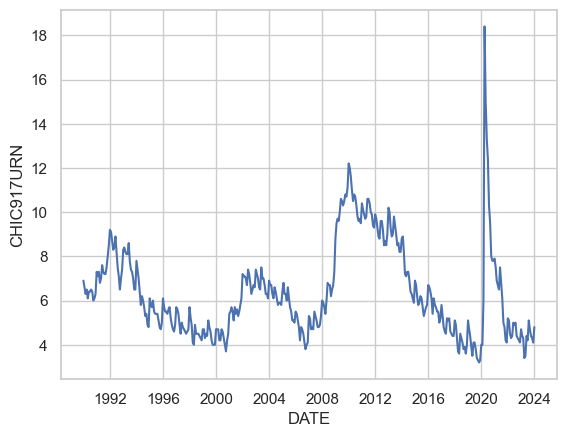

In [54]:
# make a plot of # of crimes per day by the date
sns.lineplot(x='DATE', y='CHIC917URN', data=jobs)

In [ ]:
# over lay the crime per day with this graph @@@@@@@@@@

In [53]:
X_train

tempmax  tempmin  temp  feelslikemax  feelslikemin  feelslike  humidity  \
4228     24.7      8.7  15.4          24.7           6.9       15.2      72.6   
7500     16.5     10.7  12.9          16.5          10.7       12.9      61.7   
7847     -7.0    -15.0 -10.6         -15.3         -24.3      -19.0      50.6   
6439      9.0      4.3   6.2           5.4          -0.8        2.1      75.5   
4035     35.9     22.7  29.6          37.8          22.7       31.3      61.7   
...       ...      ...   ...           ...           ...        ...       ...   
6736     30.2     13.9  23.1          28.6          13.9       22.6      44.4   
3509     23.0     18.5  20.7          23.0          18.5       20.7      79.9   
3744     18.9      9.7  14.8          18.9           8.7       14.7      63.9   
2327     12.3      1.5   4.9          12.3          -2.8        1.4      78.8   
7656     27.5     17.8  23.1          27.4          17.8       23.1      55.2   

      precip  precipprob  precipcover  ...  day_of_week  year  month  \
4228   3.212       100.0        20.83  ...            1  2010      4   
7500   0.327       100.0         4.17  ...            5  2021      4   
7847   0.000         0.0         0.00  ...            2  2014     12   
6439   0.000         0.0         0.00  ...            6  2010      3   
4035   1.273       100.0         4.17  ...            0  2012      7   
...      ...         ...          ...  ...          ...   ...    ...   
6736   0.000         0.0         0.00  ...            3  2021      6   
3509  11.280       100.0        29.17  ...            1  2011      8   
3744   0.000         0.0         0.00  ...            0  2013      9   
2327   1.451       100.0        29.17  ...            4  2014      3   
7656   0.000         0.0         0.00  ...            0  2023      7   

      preciptype              sunrise               sunset  \
4228        rain  2010-04-06T06:24:51  2010-04-06T19:21:39   
7500        rain  2021-04-24T05:56:03  2021-04-24T19:41:54   
7847         NaN  2014-12-31T07:18:12  2014-12-31T16:29:09   
6439         NaN  2010-03-14T07:04:01  2010-03-14T18:56:01   
4035        rain  2012-07-02T05:19:59  2012-07-02T20:29:10   
...          ...                  ...                  ...   
6736         NaN  2021-06-03T05:16:58  2021-06-03T20:20:59   
3509        rain  2011-08-23T06:06:35  2011-08-23T19:39:03   
3744         NaN  2013-09-23T06:39:10  2013-09-23T18:45:40   
2327        rain  2014-03-28T06:40:01  2014-03-28T19:11:44   
7656         NaN  2023-07-31T05:43:10  2023-07-31T20:10:11   

                  conditions  full_moon         Holiday  CHIC917URN  
4228          Rain, Overcast        NaN             NaN        11.0  
7500          Rain, Overcast        NaN             NaN         6.7  
7847                   Clear        NaN  New Year's Eve         5.9  
6439                Overcast        NaN             NaN        11.6  
4035  Rain, Partially cloudy        NaN             NaN         9.6  
...                      ...        ...             ...         ...  
6736        Partially cloudy        NaN             NaN         7.5  
3509  Rain, Partially cloudy        NaN             NaN        10.4  
3744        Partially cloudy        NaN             NaN         8.5  
2327          Rain, Overcast        NaN             NaN         8.2  
7656        Partially cloudy        NaN             NaN         4.2  

[3876 rows x 33 columns]

In [56]:
X.select_dtypes(include="object").columns

Index(['preciptype', 'sunrise', 'sunset', 'conditions', 'full_moon',
       'Holiday'],
      dtype='object')

In [55]:
X.select_dtypes(exclude="object").columns

Index(['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow',
       'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'severerisk', 'moonphase', 'day_of_week', 'year', 'month',
       'CHIC917URN'],
      dtype='object')

In [58]:
X['Holiday']

1969    New Year's Day
5731               NaN
6687               NaN
5531               NaN
5535               NaN
             ...      
6941               NaN
7815               NaN
7994               NaN
8271               NaN
7685               NaN
Name: Holiday, Length: 5168, dtype: object

In [99]:
crimes.columns

Index(['ID', 'Case Number', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'Beat', 'District',
       'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate',
       'Year', 'Updated On', 'Latitude', 'Longitude', 'Location', 'date',
       'time', 'day_of_week'],
      dtype='object')

In [105]:
# see what crime is most common per district
# number of 


# weakness - no fully great predictors, moon phase didn't have an effect, not enough data/not access to more data
# about this subject

# indoor vs outdoor - no weather / UV index relationship
# domestic crime maybe isn't as effected by weather



# areas with the most violent crime graph --> maybe look at Beat?
# filter by year = 2023, crime is violent


crimes23 = crimes[crimes['Year'] == 2023]



crime_counts_per_beat = crimes23.groupby('Beat').size().reset_index(name='Count')

# Extracting latitude and longitude for each beat
beat_lat_long = crimes23.groupby('Beat')[['Latitude', 'Longitude']].first().reset_index()

# Merging the two DataFrames on 'Beat'
df = pd.merge(crime_counts_per_beat, beat_lat_long, on='Beat')
df

Beat  Count   Latitude  Longitude
0   1111    890  41.898885 -87.734196
1   1112   1376  41.899477 -87.726209
2   1113    818  41.880515 -87.743842
3   1114    524  41.881999 -87.729400
4   1115    763  41.880414 -87.728111
5   1121   1408  41.891894 -87.706752
6   1122   1178  41.880779 -87.721377
7   1123    991  41.883268 -87.712151
8   1124    703  41.880594 -87.702959
9   1125    417  41.878387 -87.692347
10  1131    850  41.876016 -87.738353
11  1132   1104  41.871839 -87.726118
12  1133   1216  41.866287 -87.715726
13  1134    977  41.868234 -87.704953
14  1135   1063  41.872844 -87.699441

In [106]:
# maybe make a graphic of a map of the districts by number of violent crime in them

# do we have the lat/long coordinates for each beat???

# why don't we make a new df that has the count of violent crimes per beat and then make a map with lat/long

# new df = beat #, count of violent crime in the past year (2023), and lat/long









import plotly.express as px

# Sample data (replace with your data)
# locations = [(40.712776, -74.005974), (34.052235, -118.243683), (51.5074, -0.1278)]  # Latitude, Longitude pairs
# counts = [100, 200, 50]  # Counts for each area

# Create a DataFrame from the data
# data = {'Latitude': [loc[0] for loc in locations],
#         'Longitude': [loc[1] for loc in locations],
#         'Count': counts}
# df = pd.DataFrame(data)

# Create a scatter mapbox with counts as the marker size
fig = px.scatter_mapbox(df, lat="Latitude", lon="Longitude",
                        hover_name="Count", hover_data=["Count"],
                        zoom=2, height=500, size="Count")

# Update layout to add map style
fig.update_layout(mapbox_style="carto-positron", title="Map Visualization with Counts")

# Show the plot
fig.show()


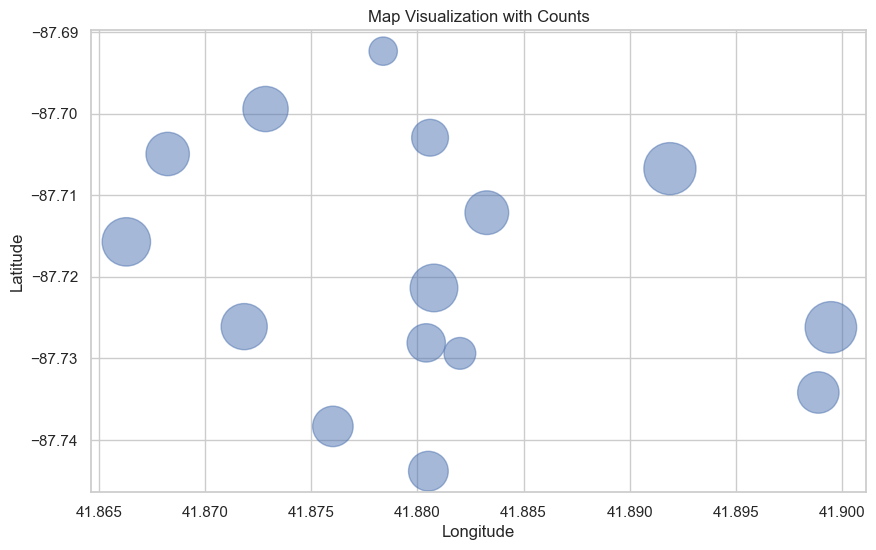

In [114]:
import matplotlib.pyplot as plt

# Sample data (replace with your data)
# locations = [(40.712776, -74.005974), (34.052235, -118.243683), (51.5074, -0.1278)]  # Latitude, Longitude pairs
# counts = [100, 200, 50]  # Counts for each area

# locations = df.loc[:, ['Latitude', 'Longitude']]
# counts = df.loc[:, 'Count']

locations = df[['Latitude', 'Longitude']].values.tolist()
counts = df['Count'].tolist()


plt.figure(figsize=(10, 6))
plt.scatter(*zip(*locations), s=counts, alpha=0.5)

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Map Visualization with Counts')

# Show the plot
plt.grid(True)
plt.show()


In [178]:
import folium
from folium.plugins import HeatMap

# Sample data (replace with your data)
# locations = [(40.712776, -74.005974), (34.052235, -118.243683), (51.5074, -0.1278)]  # Latitude, Longitude pairs
# counts = [100, 200, 50]  # Counts for each area
locations = df.loc[:, ['Latitude', 'Longitude']]
counts = df.loc[:, 'Count']


# Create a map centered around the mean of the provided locations
map_center = [sum(x[0] for x in locations)/len(locations), sum(x[1] for x in locations)/len(locations)]
mymap = folium.Map(location=map_center, zoom_start=2)

# Add markers with counts
for location, count in zip(locations, counts):
    folium.Marker(location=location, popup=f'Count: {count}').add_to(mymap)

# Add heatmap layer
heat_data = [[loc[0], loc[1], weight] for loc, weight in zip(locations, counts)]
HeatMap(heat_data).add_to(mymap)

# Save the map as an HTML file
mymap.save("map_visualization.html")


TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [111]:
df.dtypes

Beat           int64
Count          int64
Latitude     float64
Longitude    float64
dtype: object

In [179]:
locations = df[['Latitude', 'Longitude']].values.tolist()
counts = df['Count'].tolist()

map_center = [sum(x[0] for x in locations)/len(locations), sum(x[1] for x in locations)/len(locations)]
mymap = folium.Map(location=map_center, zoom_start=2)

# Add markers with counts
for location, count in zip(locations, counts):
    folium.Marker(location=location, popup=f'Count: {count}').add_to(mymap)

# Save the map as an HTML file
# mymap.save("map_visualization.html")

In [182]:
import folium
import pandas as pd

# Sample data (replace with your actual DataFrame)
# df = ...

# Filter DataFrame for relevant columns
locations = df[['Latitude', 'Longitude']].values.tolist()
counts = df['Count'].tolist()

# Create a map centered around the mean of the provided locations
map_center = [sum(x[0] for x in locations)/len(locations), sum(x[1] for x in locations)/len(locations)]
mymap = folium.Map(location=map_center, zoom_start=2)

# Add markers with counts
for location, count in zip(locations, counts):
    folium.CircleMarker(
        location=location,
        radius=20,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        popup=f'Count: {count}'
    ).add_to(mymap)
    folium.Marker(
        location=location,
        icon=folium.DivIcon(html=f'<div style="font-size: 9pt; color: black;">{count}</div>')
    ).add_to(mymap)

# Save the map as an HTML file
mymap.save("map_visualization2.html")



#still need to filter these down to just VIOLENT CRIMES
# is filtered down to crimes in 2023

# correlation of weather is high

In [118]:
weather['sealevelpressure'].value_counts()

sealevelpressure
1016.2    45
1015.9    43
1016.7    42
1014.8    41
1016.0    41
          ..
1037.3     1
1038.0     1
1038.9     1
1037.7     1
1035.5     1
Name: count, Length: 411, dtype: int64

In [119]:
crime.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [120]:
crime['Primary Type'].value_counts()

Primary Type
NARCOTICS                            133988
BATTERY                              102071
THEFT                                 57756
CRIMINAL DAMAGE                       43168
ASSAULT                               32095
OTHER OFFENSE                         23849
ROBBERY                               22301
MOTOR VEHICLE THEFT                   21436
BURGLARY                              15266
DECEPTIVE PRACTICE                    12759
PROSTITUTION                          11309
WEAPONS VIOLATION                     10120
CRIMINAL TRESPASS                      9053
OFFENSE INVOLVING CHILDREN             2962
PUBLIC PEACE VIOLATION                 2877
GAMBLING                               2088
INTERFERENCE WITH PUBLIC OFFICER       2062
CRIM SEXUAL ASSAULT                    1613
HOMICIDE                               1398
SEX OFFENSE                            1267
ARSON                                   883
CRIMINAL SEXUAL ASSAULT                 490
LIQUOR LAW VIOLATIO

In [122]:
crime['Location Description'].value_counts()

Location Description
STREET                                             147309
SIDEWALK                                            95368
RESIDENCE                                           61446
APARTMENT                                           58919
ALLEY                                               17665
                                                    ...  
TRUCK                                                   1
ROOMING HOUSE                                           1
STAIRWELL                                               1
LIQUOR STORE                                            1
VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS         1
Name: count, Length: 157, dtype: int64

In [124]:
crime['Domestic'].value_counts()

Domestic
False    418295
True      93892
Name: count, dtype: int64

In [7]:
# filter the crime dataset (number of crimes per day) with whether they were domestic or not...also location
# filter by violent crimes


crimes2 = crimes[(crimes['FBI Code'] == '01A') | 
                 (crimes['FBI Code'] == '02') | 
                 (crimes['FBI Code'] == '03') | 
                 (crimes['FBI Code'] == '04A')]
# crime_count2 = pd.DataFrame(crimes2['date'].value_counts().reset_index())

crimes2['Domestic'].value_counts()



Domestic
False    31153
True      4748
Name: count, dtype: int64

In [8]:
crimes23 = crimes[crimes['Year'] == 2023]

crimes23_v = crimes23[(crimes['FBI Code'] == '01A') | 
                 (crimes['FBI Code'] == '02') | 
                 (crimes['FBI Code'] == '03') | 
                 (crimes['FBI Code'] == '04A')]
len(crimes23)
len(crimes23_v)

/var/folders/xb/kh9kw84n5k57h6w4jp5kr23m0000gn/T/ipykernel_4931/1855548511.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  crimes23_v = crimes23[(crimes['FBI Code'] == '01A') |


1542

In [130]:
1542 / 14278

0.10799831909230985

In [132]:
all_violent = crimes[(crimes['FBI Code'] == '01A') | 
                 (crimes['FBI Code'] == '02') | 
                 (crimes['FBI Code'] == '03') | 
                 (crimes['FBI Code'] == '04A')]
len(all_violent)

35901

In [131]:
len(crime)

512187

In [133]:
35901 / 512187

0.07009354005470658

In [134]:
crimes['Year'].value_counts()

Year
2002    30065
2003    30020
2004    29325
2005    29243
2006    28307
2001    27659
2007    26559
2008    25694
2009    23464
2010    22590
2012    22083
2013    21958
2011    21611
2014    20673
2015    19535
2018    19281
2019    18726
2016    18655
2017    18071
2020    15064
2023    14278
2021    13969
2022    13481
2024     1876
Name: count, dtype: int64

In [54]:
import pandas as pd

# Sample DataFrame 'crime' (replace with your actual DataFrame)
# crime = ...

# Initialize dictionaries to store results
total_crimes_per_year = {}
violent_crimes_per_year = {}
domestic_violent_per_year = {}

# Iterate over unique years
for year in crime['Year'].unique():
    # Filter data for the current year
    crimes_year = crime[crime['Year'] == year]
    
    # Record total number of crimes for the year
    total_crimes_per_year[year] = len(crimes_year)
    
    # Filter violent crimes for the current year
    violent_crimes_year = crimes_year[(crimes_year['FBI Code'] == '01A') |
                                      (crimes_year['FBI Code'] == '02') |
                                      (crimes_year['FBI Code'] == '03') |
                                      (crimes_year['FBI Code'] == '04A')]
    
    # Record number of violent crimes for the year
    violent_crimes_per_year[year] = len(violent_crimes_year)
    
    domestic_violent_per_year[year] = violent_crimes_year[violent_crimes_year['Domestic'] == True]

# # Print results
# print("Total crimes per year:")
# for year, total_crimes in total_crimes_per_year.items():
#     print(f"{year}: {total_crimes}")

# print("\nViolent crimes per year:")
# for year, violent_crimes in violent_crimes_per_year.items():
#     print(f"{year}: {violent_crimes}")





total_crimes_df = pd.DataFrame(list(total_crimes_per_year.items()), columns=['Year', 'Total Crimes'])
violent_crimes_df = pd.DataFrame(list(violent_crimes_per_year.items()), columns=['Year', 'Violent Crimes'])
domestic_crimes_df = pd.DataFrame(list(domestic_violent_per_year.items()), columns=['Year', 'Violent Crimes'])


# Merge the two DataFrames on 'Year' column
crime_stats = pd.merge(total_crimes_df, violent_crimes_df, on='Year')

all_crime_stats = pd.merge(crime_stats, domestic_crimes_df, on='Year')
all_crime_stats = all_crime_stats.sort_values(by='Year')


# Sort the DataFrame by the 'Year' column
crime_stats = crime_stats.sort_values(by='Year')
crime_stats['Percent Violent'] = (crime_stats['Violent Crimes'] / crime_stats['Total Crimes']) * 100


# Display the DataFrame
print(crime_stats)






    Year  Total Crimes  Violent Crimes  Percent Violent
23  2001         27659            1962         7.093532
14  2002         30065            2053         6.828538
17  2003         30020            1782         5.936043
9   2004         29325            1661         5.664109
4   2005         29243            1595         5.454297
16  2006         28307            1559         5.507472
20  2007         26559            1539         5.794646
7   2008         25694            1760         6.849848
11  2009         23464            1580         6.733720
21  2010         22590            1517         6.715361
10  2011         21611            1543         7.139882
22  2012         22083            1497         6.778970
18  2013         21958            1216         5.537845
5   2014         20673            1252         6.056209
12  2015         19535            1406         7.197338
13  2016         18655            1666         8.930582
19  2017         18071            1603         8

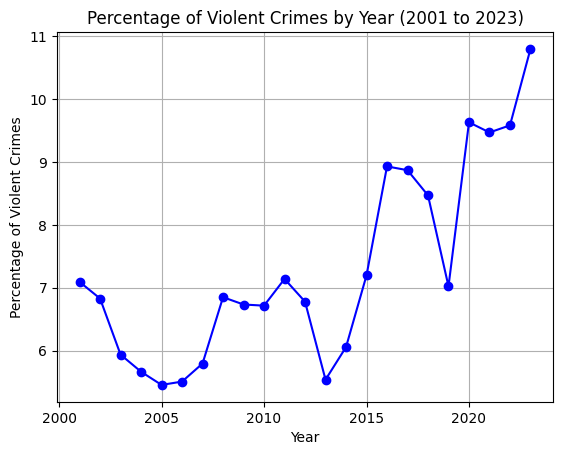

In [16]:
crime_stats_filtered = crime_stats[crime_stats['Year'] != 2024]

# Plotting
# plt.figure(figsize=(10, 6))
plt.plot(crime_stats_filtered['Year'], crime_stats_filtered['Percent Violent'], marker='o', color='b', linestyle='-')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Percentage of Violent Crimes')
plt.title('Percentage of Violent Crimes by Year (2001 to 2023)')

# Showing grid
plt.grid(True)crime_stats_filtered = crime_stats[crime_stats['Year'] != 2024]

# Plotting
# plt.figure(figsize=(10, 6))
plt.plot(crime_stats_filtered['Year'], crime_stats_filtered['Percent Violent'], marker='o', color='b', linestyle='-')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Percentage of Violent Crimes')
plt.title('Percentage of Violent Crimes by Year (2001 to 2023)')

# Showing grid
plt.grid(True)

plt.savefig('violent_crimes_by_year.png')

# Showing the plot
plt.show()


plt.savefig('violent_crimes_by_year.png')

# Showing the plot
plt.show()


# overlay the unemployment rate on top of this??
# get the average value of unemployment by year, then put it on top of this plot








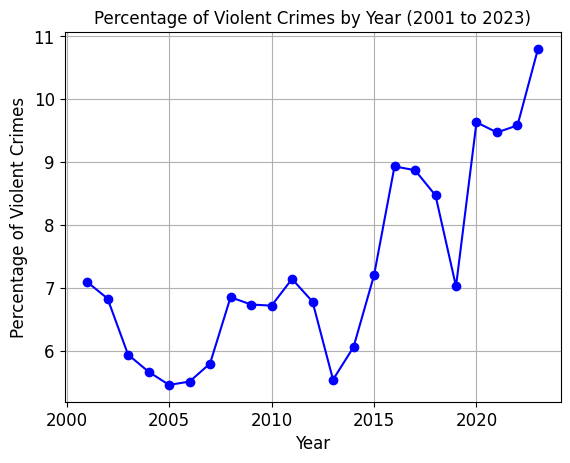

In [25]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
plt.plot(crime_stats_filtered['Year'], crime_stats_filtered['Percent Violent'], marker='o', color='b', linestyle='-')

# Adding labels and title
plt.xlabel('Year', fontsize=12)  # Adjust the fontsize as needed
plt.ylabel('Percentage of Violent Crimes', fontsize=12)
plt.title('Percentage of Violent Crimes by Year (2001 to 2023)')

plt.xticks(fontsize=12)  # Adjust the fontsize for x-axis tick labels
plt.yticks(fontsize=12) 

# Showing grid
plt.grid(True)

# plt.savefig('violent_crimes_by_year.png')

# Showing the plot
plt.show()




# HERE HERE HERE


In [146]:
crimes_year['Primary Type'].value_counts()

Primary Type
NARCOTICS                           7978
BATTERY                             5938
THEFT                               3098
CRIMINAL DAMAGE                     2193
ASSAULT                             1667
ROBBERY                             1243
MOTOR VEHICLE THEFT                 1183
OTHER OFFENSE                       1150
BURGLARY                             866
CRIMINAL TRESPASS                    515
PROSTITUTION                         424
DECEPTIVE PRACTICE                   345
WEAPONS VIOLATION                    316
OFFENSE INVOLVING CHILDREN           140
PUBLIC PEACE VIOLATION               128
CRIM SEXUAL ASSAULT                  101
HOMICIDE                              72
GAMBLING                              71
SEX OFFENSE                           67
LIQUOR LAW VIOLATION                  49
ARSON                                 47
KIDNAPPING                            36
INTERFERENCE WITH PUBLIC OFFICER      17
INTIMIDATION                           8
STA

In [147]:
crimes_year['Description'].value_counts()

Description
SIMPLE                                      5672
POSS: CRACK                                 2408
POSS: HEROIN(WHITE)                         2264
$500 AND UNDER                              2063
TO PROPERTY                                 1110
                                            ... 
VIO BAIL BOND: DOM VIOLENCE                    1
ILLEGAL ILL LOTTERY                            1
ATTEMPT: ARMED-OTHER FIREARM                   1
MANU/DELIVER:BARBITUATES                       1
SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER       1
Name: count, Length: 180, dtype: int64

In [32]:
crimes_v = crimes[(crimes['FBI Code'] == '01A') | 
                 (crimes['FBI Code'] == '02') | 
                 (crimes['FBI Code'] == '03') | 
                 (crimes['FBI Code'] == '04A')]

crimes_v['Primary Type'].unique()

array(['HOMICIDE', 'ASSAULT', 'ROBBERY', 'CRIMINAL SEXUAL ASSAULT',
       'OFFENSE INVOLVING CHILDREN', 'CRIM SEXUAL ASSAULT'], dtype=object)

In [164]:
crimes_per_day

date  Number of Crimes
0     2001-01-01                19
1     2001-01-02                 5
2     2001-01-03                 5
3     2001-01-04                 6
4     2001-01-05                 4
...          ...               ...
8266  2024-02-20                 4
8267  2024-02-21                 4
8268  2024-02-22                 1
8269  2024-02-23                 1
8270  2024-02-24                 3

[8271 rows x 2 columns]

In [163]:
jobs

DATE  CHIC917URN
0   1990-01-01         6.9
1   1990-02-01         6.6
2   1990-03-01         6.3
3   1990-04-01         6.5
4   1990-05-01         6.1
..         ...         ...
404 2023-09-01         4.7
405 2023-10-01         4.4
406 2023-11-01         4.3
407 2023-12-01         4.1
408 2024-01-01         4.8

[409 rows x 2 columns]

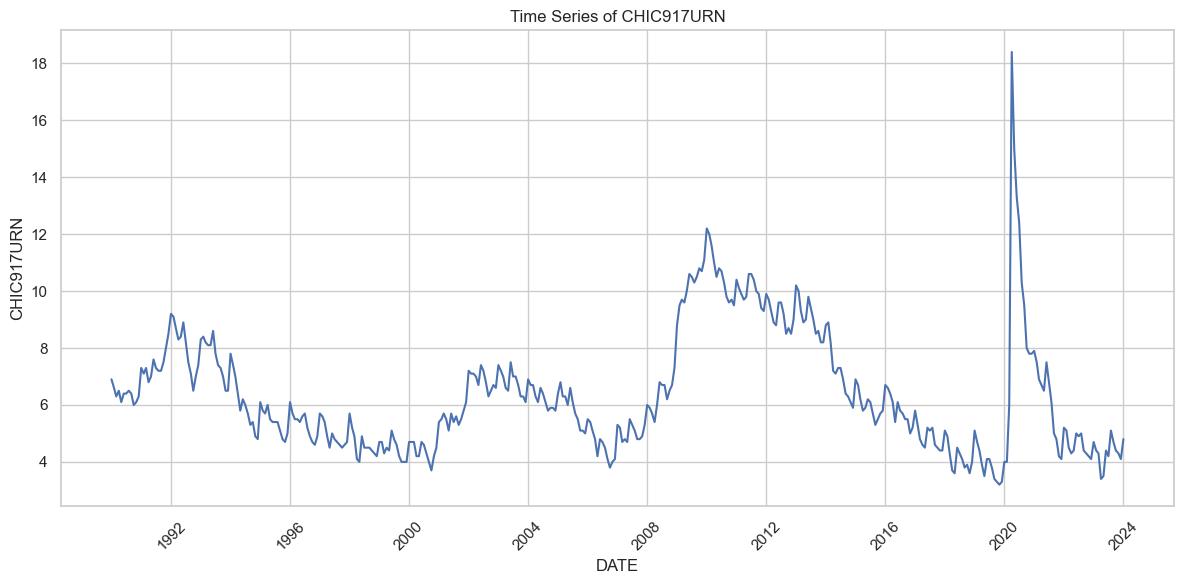

In [152]:
jobs['DATE'] = pd.to_datetime(jobs['DATE'])
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='DATE', y='CHIC917URN', data=jobs)
plt.title('Time Series of CHIC917URN')
plt.xlabel('DATE')
plt.ylabel('CHIC917URN')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


# add a line to this graph that has the number of crimes per day
# or graph that first, then add overlap

In [41]:
# use crimes_v to represent violent crime, now need to add it up to the crimes per day put keep the date


crimes_per_day = crimes_v.groupby(crimes_v['date'].dt.date).size().reset_index(name='Number of Crimes')



# filter crimes per day to just the year 2023

# crimes_per_day23 = crimes_per_day[crimes_per_day['Year' == 2023]]
# crimes23 = crimes_per_day[crimes_per_day['Year'] == 2023]


crimes_per_day['date'] = pd.to_datetime(crimes_per_day['date'])

# Filter the DataFrame to include only dates in 2023
crimes23 = crimes_per_day[crimes_per_day['date'].dt.year == 2023]








import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame crimes_per_day (replace with your actual DataFrame)
# crimes_per_day = ...


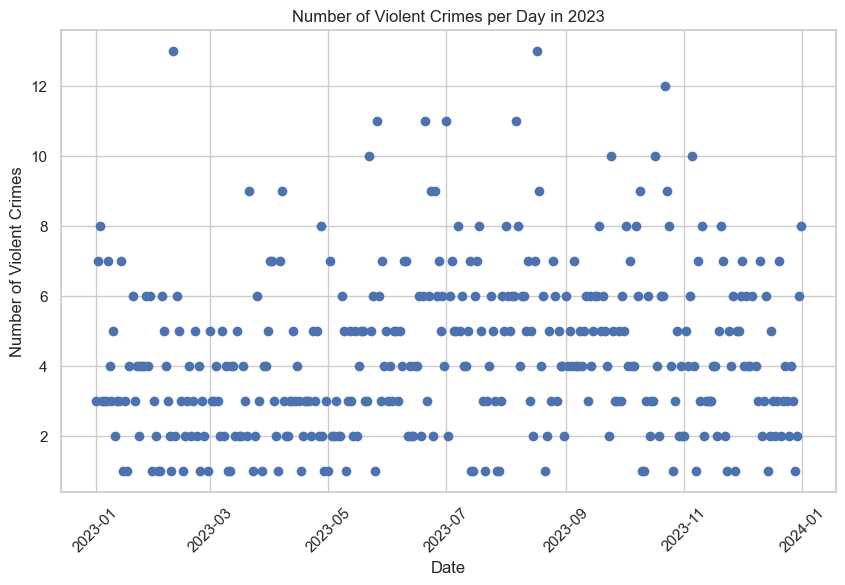

In [176]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(crimes23['date'], crimes23['Number of Crimes'], color='b')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Number of Violent Crimes')
plt.title('Number of Violent Crimes per Day in 2023')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Showing grid
plt.grid(True)

# Showing the plot
plt.show()


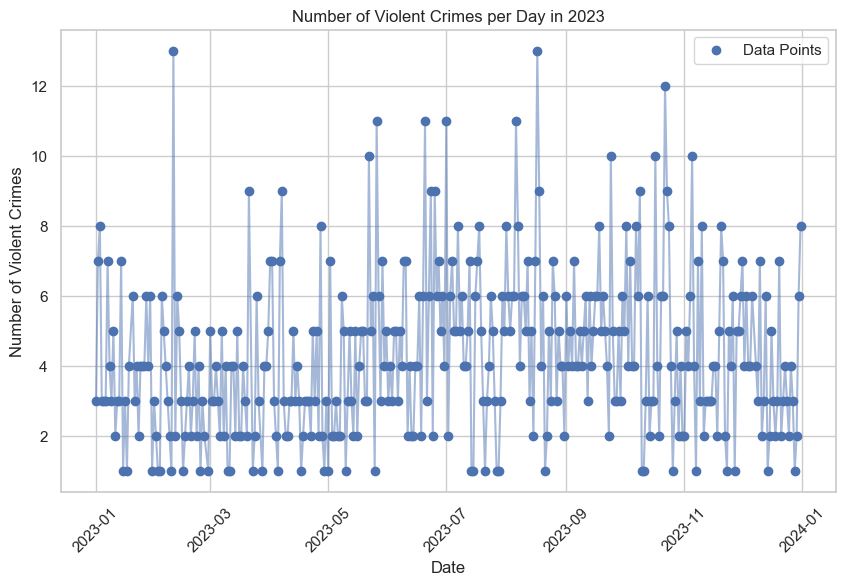

In [177]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(crimes23['date'], crimes23['Number of Crimes'], color='b', label='Data Points')

# Connect the dots with lines
plt.plot(crimes23['date'], crimes23['Number of Crimes'], color='b', linestyle='-', alpha=0.5)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Number of Violent Crimes')
plt.title('Number of Violent Crimes per Day in 2023')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Showing grid
plt.grid(True)

# Showing the plot
plt.legend()
plt.show()


In [42]:
crimes_per_day

date  Number of Crimes
0    2001-01-01                19
1    2001-01-02                 5
2    2001-01-03                 5
3    2001-01-04                 6
4    2001-01-05                 4
...         ...               ...
8266 2024-02-20                 4
8267 2024-02-21                 4
8268 2024-02-22                 1
8269 2024-02-23                 1
8270 2024-02-24                 3

[8271 rows x 2 columns]

In [43]:
import pandas as pd

# Assuming crimes_per_day is your DataFrame
# Convert 'date' column to datetime if it's not already
crimes_per_day['date'] = pd.to_datetime(crimes_per_day['date'])

# Extract year from the 'date' column and create a new column
crimes_per_day['year'] = crimes_per_day['date'].dt.year

# Group by 'year' and calculate the average number of crimes for each year
average_crimes_per_year = crimes_per_day.groupby('year')['Number of Crimes'].mean().reset_index()
average_crimes_per_year.columns = ['year', 'Average Crimes']

# Merge the average crimes per year back to the original DataFrame
crimes_per_day = pd.merge(crimes_per_day, average_crimes_per_year, on='year')

# Display the updated DataFrame
print(crimes_per_day)


           date  Number of Crimes  year  Average Crimes
0    2001-01-01                19  2001        5.419890
1    2001-01-02                 5  2001        5.419890
2    2001-01-03                 5  2001        5.419890
3    2001-01-04                 6  2001        5.419890
4    2001-01-05                 4  2001        5.419890
...         ...               ...   ...             ...
8266 2024-02-20                 4  2024        3.142857
8267 2024-02-21                 4  2024        3.142857
8268 2024-02-22                 1  2024        3.142857
8269 2024-02-23                 1  2024        3.142857
8270 2024-02-24                 3  2024        3.142857

[8271 rows x 4 columns]


In [44]:
# Filter the DataFrame to show only the first day of each year
first_days_of_year = crimes_per_day[crimes_per_day['date'].dt.dayofyear == 1]

# Display the filtered DataFrame
print(first_days_of_year)


           date  Number of Crimes  year  Average Crimes
0    2001-01-01                19  2001        5.419890
362  2002-01-01                11  2002        5.640110
726  2003-01-01                10  2003        4.936288
1087 2004-01-01                12  2004        4.601108
1448 2005-01-01                12  2005        4.467787
1805 2006-01-01                10  2006        4.379213
2161 2007-01-01                11  2007        4.298883
2519 2008-01-01                 9  2008        4.835165
2883 2009-01-01                10  2009        4.340659
3247 2010-01-01                13  2010        4.249300
3604 2011-01-01                 6  2011        4.274238
3965 2012-01-01                12  2012        4.252841
4317 2013-01-01                 8  2013        3.514451
4663 2014-01-01                15  2014        3.597701
5011 2015-01-01                13  2015        3.949438
5367 2016-01-01                 8  2016        4.602210
5729 2017-01-01                14  2017        4

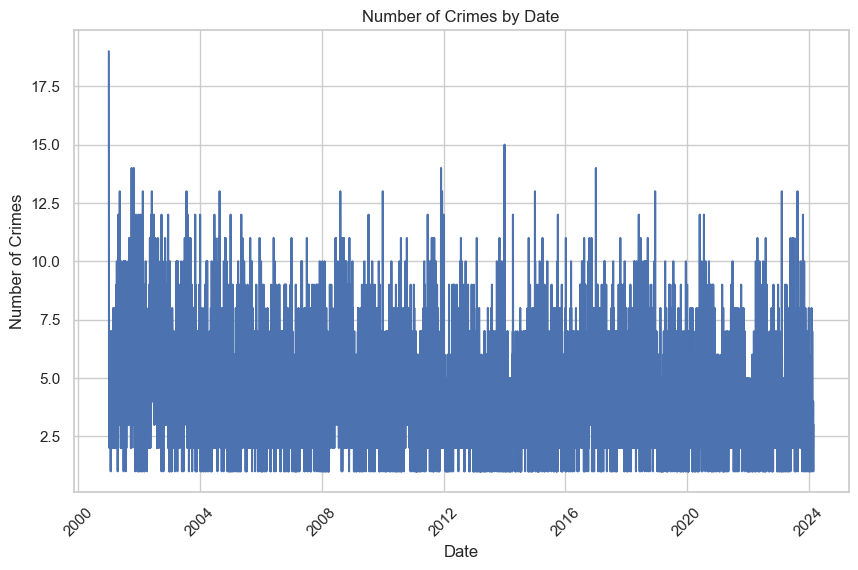

In [162]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame crimes_per_day (replace with your actual DataFrame)
# crimes_per_day = ...

# Set the style
sns.set_style("whitegrid")

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='Number of Crimes', data=crimes_per_day, color='b', marker=None)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes by Date')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Showing the plot
plt.show()


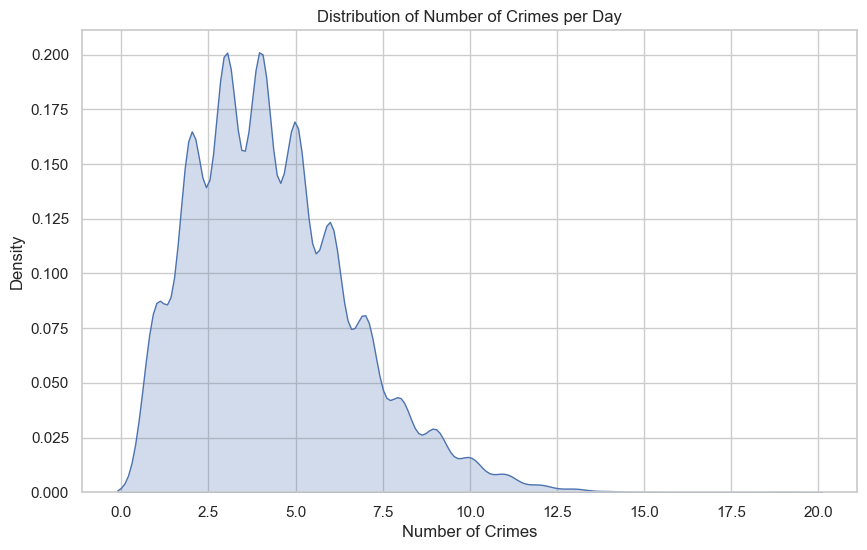

In [160]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame crimes_per_day (replace with your actual DataFrame)
# crimes_per_day = ...

# Set the style
sns.set_style("whitegrid")

# Plotting
plt.figure(figsize=(10, 6))
sns.kdeplot(data=crimes_per_day['Number of Crimes'], color='b', fill=True)

# Adding labels and title
plt.xlabel('Number of Crimes')
plt.ylabel('Density')
plt.title('Distribution of Number of Crimes per Day')

# Showing the plot
plt.show()


In [167]:
jobs['DATE'] = pd.to_datetime(jobs['DATE'])

# Extract year from the 'DATE' column
jobs['Year'] = jobs['DATE'].dt.year

# Group by year and calculate the average value for each year
filtered_jobs = jobs[(jobs['Year'] >= 2001) & (jobs['Year'] <= 2023)]

# Group by year and calculate the average value for each year
jobs_yearly_avg = filtered_jobs.groupby('Year')['CHIC917URN'].mean().reset_index()

# Rename the column to represent the yearly average
jobs_yearly_avg = jobs_yearly_avg.rename(columns={'CHIC917URN': 'Yearly Average'})
jobs_yearly_avg

Year  Yearly Average
0   2001        5.550000
1   2002        6.883333
2   2003        6.800000
3   2004        6.266667
4   2005        5.908333
5   2006        4.583333
6   2007        5.033333
7   2008        6.325000
8   2009       10.175000
9   2010       10.641667
10  2011       10.008333
11  2012        9.141667
12  2013        9.091667
13  2014        7.200000
14  2015        5.983333
15  2016        5.833333
16  2017        4.866667
17  2018        4.150000
18  2019        3.900000
19  2020        9.708333
20  2021        6.166667
21  2022        4.616667
22  2023        4.291667

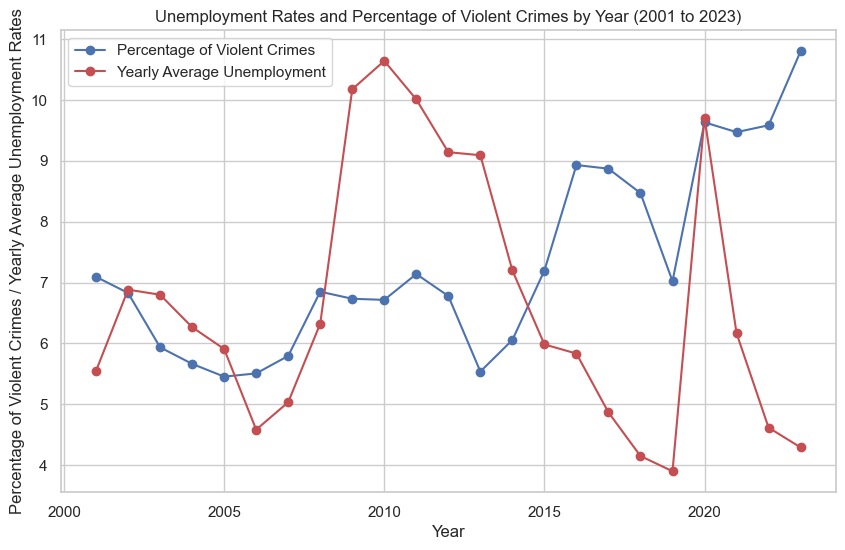

In [188]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame crime_stats_filtered (replace with your actual DataFrame)
# crime_stats_filtered = ...

# Sample DataFrame jobs_yearly_avg (replace with your actual DataFrame)
# jobs_yearly_avg = ...

# Plotting
plt.figure(figsize=(10, 6))

# Plotting percentage of violent crimes
plt.plot(crime_stats_filtered['Year'], crime_stats_filtered['Percent Violent'], marker='o', color='b', linestyle='-')

# Plotting yearly average of jobs
plt.plot(jobs_yearly_avg['Year'], jobs_yearly_avg['Yearly Average'], marker='o', color='r', linestyle='-')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Percentage of Violent Crimes / Yearly Average Unemployment Rates')
plt.title('Unemployment Rates and Percentage of Violent Crimes by Year (2001 to 2023)')

# Showing grid
plt.grid(True)

# Showing the plot
plt.legend(['Percentage of Violent Crimes', 'Yearly Average Unemployment'])
plt.show()


In [186]:
crimes23_v['Primary Type'].value_counts()

Primary Type
ROBBERY                       888
ASSAULT                       474
CRIMINAL SEXUAL ASSAULT        91
HOMICIDE                       79
OFFENSE INVOLVING CHILDREN     10
Name: count, dtype: int64

In [191]:
crime['Domestic'].value_counts()

Domestic
False    418295
True      93892
Name: count, dtype: int64

In [9]:
crimes23_v['Domestic'].value_counts()

Domestic
False    1301
True      241
Name: count, dtype: int64

In [38]:
past_five['Domestic']

0          True
1         False
2         False
3          True
4         False
          ...  
512182     True
512183    False
512184     True
512185    False
512186    False
Name: Domestic, Length: 75518, dtype: bool

In [36]:
past_five = past_five = crime[crime['Year'].isin([2019, 2020, 2021, 2022, 2023])]
past_five['Year'].value_counts()

Year
2019    18726
2020    15064
2023    14278
2021    13969
2022    13481
Name: count, dtype: int64

In [35]:
past_five_v = past_five[(past_five['FBI Code'] == '01A') | 
                 (past_five['FBI Code'] == '02') | 
                 (past_five['FBI Code'] == '03') | 
                 (past_five['FBI Code'] == '04A')]

past_five_v['Year'].value_counts()

Year
2023    1542
2020    1451
2021    1323
2019    1315
2022    1292
Name: count, dtype: int64

In [39]:
past_five_vd = past_five_v[past_five_v['Domestic'] == True]
past_five_vd['Year'].value_counts()

Year
2021    251
2023    241
2020    228
2022    225
2019    219
Name: count, dtype: int64

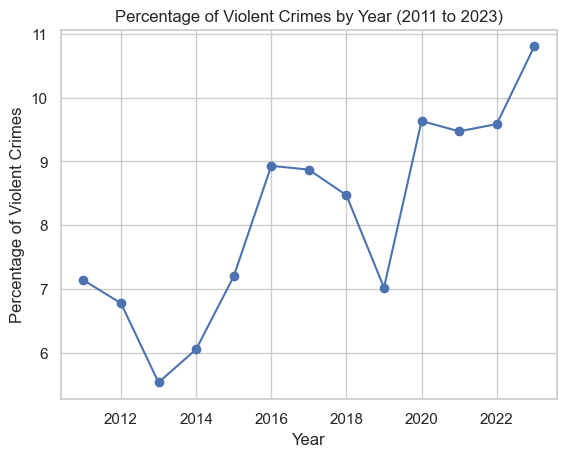

In [48]:
# crime_stats_filtered = crime_stats[crime_stats['Year'] != 2024]
crime_stats_filtered = crime_stats[crime_stats['Year'].isin([2011, 2012, 2013, 2014, 2015, 2016,
                                                             2017, 2018, 2019, 2020, 2021, 2022, 2023])]


# Plotting
# plt.figure(figsize=(10, 6))
plt.plot(crime_stats_filtered['Year'], crime_stats_filtered['Percent Violent'], marker='o', color='b', linestyle='-')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Percentage of Violent Crimes')
plt.title('Percentage of Violent Crimes by Year (2011 to 2023)')

# Showing grid
plt.grid(True)

plt.savefig('violent_crimes_by_year11_23.png')

# Showing the plot
plt.show()


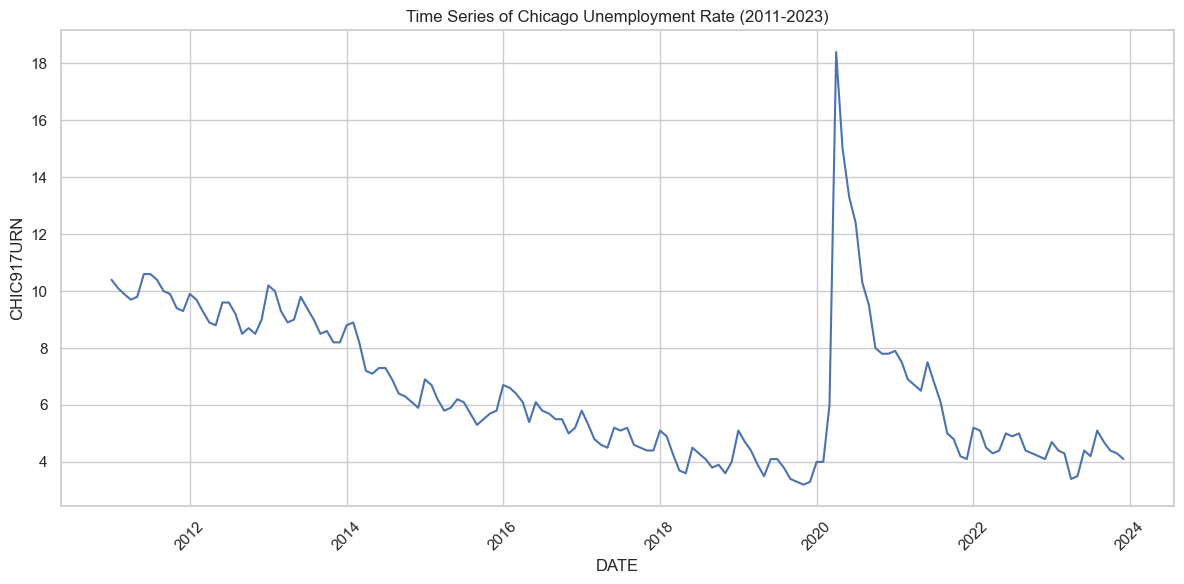

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'jobs' is your DataFrame containing the date column 'DATE'
# Convert 'DATE' column to datetime if it's not already
jobs['DATE'] = pd.to_datetime(jobs['DATE'])

# Filter dates from 2011 to 2023
filtered_jobs = jobs[(jobs['DATE'].dt.year >= 2011) & (jobs['DATE'].dt.year <= 2023)]

# Plot the filtered data
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='DATE', y='CHIC917URN', data=filtered_jobs)
plt.title('Time Series of Chicago Unemployment Rate (2011-2023)')
plt.xlabel('DATE')
plt.ylabel('CHIC917URN')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [61]:
import pandas as pd

# Sample DataFrame 'crime' (replace with your actual DataFrame)
# crime = ...

# Initialize dictionaries to store results
total_crimes_per_year = {}
violent_crimes_per_year = {}
domestic_violent_per_year = {}

# Iterate over unique years
for year in crime['Year'].unique():
    # Filter data for the current year
    crimes_year = crime[crime['Year'] == year]
    
    # Record total number of crimes for the year
    total_crimes_per_year[year] = len(crimes_year)
    
    # Filter violent crimes for the current year
    violent_crimes_year = crimes_year[(crimes_year['FBI Code'] == '01A') |
                                      (crimes_year['FBI Code'] == '02') |
                                      (crimes_year['FBI Code'] == '03') |
                                      (crimes_year['FBI Code'] == '04A')]
    
    # Record number of violent crimes for the year
    violent_crimes_per_year[year] = len(violent_crimes_year)
    d_per_year = violent_crimes_year[violent_crimes_year['Domestic'] == True]
    domestic_violent_per_year[year] = len(d_per_year)

    
    
total_crimes_df = pd.DataFrame(list(total_crimes_per_year.items()), columns=['Year', 'Total Crimes'])
violent_crimes_df = pd.DataFrame(list(violent_crimes_per_year.items()), columns=['Year', 'Violent Crimes'])
domestic_crimes_df = pd.DataFrame(list(domestic_violent_per_year.items()), columns=['Year', 'Domestic Crimes'])


# Merge the two DataFrames on 'Year' column
crime_stats = pd.merge(total_crimes_df, violent_crimes_df, on='Year')

all_crime_stats = pd.merge(crime_stats, domestic_crimes_df, on='Year')
all_crime_stats = all_crime_stats.sort_values(by='Year')


# Sort the DataFrame by the 'Year' column
crime_stats = crime_stats.sort_values(by='Year')
crime_stats['Percent Violent'] = (crime_stats['Violent Crimes'] / crime_stats['Total Crimes']) * 100


# Display the DataFrame
# print(crime_stats)






In [ ]:
# total_crimes_df = pd.DataFrame(list(total_crimes_per_year.items()), columns=['Year', 'Total Crimes'])
# violent_crimes_df = pd.DataFrame(list(violent_crimes_per_year.items()), columns=['Year', 'Violent Crimes'])
# domestic_violent_crimes_df = pd.DataFrame(list(domestic_per_year.items()), columns = ['Year', 'Domestic Crimes'])

# # Merge the two DataFrames on 'Year' column
# crime_stats = pd.merge(total_crimes_df, violent_crimes_df, on='Year')

# # Sort the DataFrame by the 'Year' column
# crime_stats = crime_stats.sort_values(by='Year')
# crime_stats['Percent Violent'] = (crime_stats['Violent Crimes'] / crime_stats['Total Crimes']) * 100


In [62]:
# plot of the total number of crimes each year

all_crime_stats

all_c = all_crime_stats[all_crime_stats['Year'].isin([2011, 2012, 2013, 2014, 2015, 2016,
                                                             2017, 2018, 2019, 2020, 2021, 2022, 2023])]

all_c

Year  Total Crimes  Violent Crimes  Domestic Crimes
10  2011         21611            1543              199
22  2012         22083            1497              189
18  2013         21958            1216              163
5   2014         20673            1252              189
12  2015         19535            1406              204
13  2016         18655            1666              205
19  2017         18071            1603              220
6   2018         19281            1633              226
1   2019         18726            1315              219
8   2020         15064            1451              228
2   2021         13969            1323              251
3   2022         13481            1292              225
0   2023         14278            1542              241

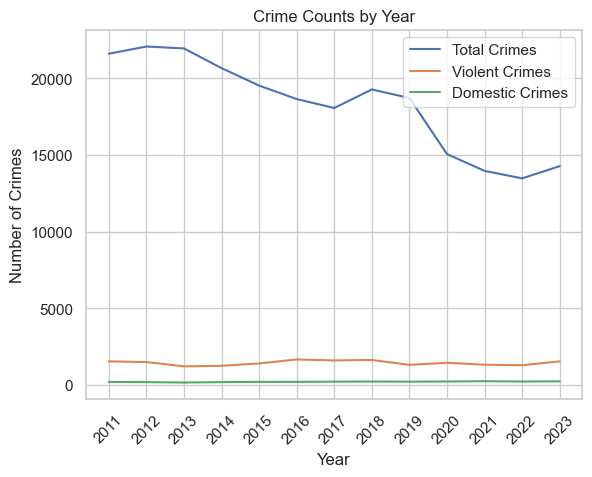

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Sort the DataFrame by 'Year'
df_sorted = all_c

# Plot Total Crimes
plt.plot(df_sorted['Year'], df_sorted['Total Crimes'], label='Total Crimes')

# Plot Violent Crimes
plt.plot(df_sorted['Year'], df_sorted['Violent Crimes'], label='Violent Crimes')

# Plot Domestic Crimes
plt.plot(df_sorted['Year'], df_sorted['Domestic Crimes'], label='Domestic Crimes')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Crime Counts by Year')
plt.xticks(df_sorted['Year'])  # Set x-axis ticks to match the years
plt.legend(loc='upper right')  # Show legend
plt.xticks(rotation=45) 
plt.grid(True)  # Add grid
plt.show()


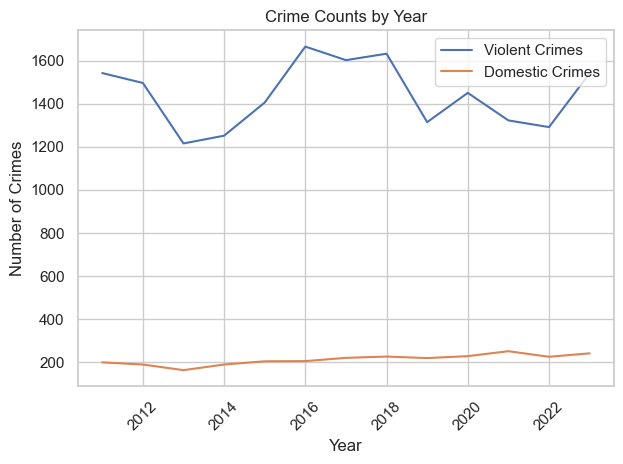

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Sort the DataFrame by 'Year'
# df_sorted = df.sort_values(by='Year')
df_sorted = all_c


# Set the style
sns.set(style="whitegrid")
# sns.set(style="darkgrid")


# Plot the data
# plt.figure(figsize=(10, 6))
# sns.lineplot(x='Year', y='Total Crimes', data=df_sorted, label='Total Crimes')
sns.lineplot(x='Year', y='Violent Crimes', data=df_sorted, label='Violent Crimes')
sns.lineplot(x='Year', y='Domestic Crimes', data=df_sorted, label='Domestic Crimes')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Crime Counts by Year')
plt.xticks(rotation=45) 
plt.legend(loc='upper right')  # Show legend in the top right corner
plt.grid(True)  # Add grid
plt.tight_layout()
plt.show()
